In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Loading hydrogen concentration

H2_conc = np.loadtxt('hydrogen_concentration.txt', skiprows=1)
# convert it to pandas dataframe
H2_conc = pd.DataFrame(H2_conc)

number_of_nodes = len(H2_conc.columns) - 1

nodes_names = [f"node_{i}" for i in range(1, number_of_nodes + 1)]
columns = ['time'] + nodes_names
H2_conc.columns = columns
print(H2_conc)
# save to csv
H2_conc.to_csv('hydrogen_concentration.csv', index=False)

          time     node_1     node_2     node_3     node_4     node_5   
0          0.0   0.000000   0.000000   0.000000   0.000000   0.000000  \
1      10000.0  20.000013  20.000004  19.999998  20.000004  19.999996   
2      20000.0  20.000013  20.000006  19.999996  20.000002  20.000004   
3      30000.0  20.000010  20.000008  19.999998  20.000004  20.000002   
4      40000.0  20.000010  20.000008  20.000000  20.000004  20.000002   
..         ...        ...        ...        ...        ...        ...   
96    960000.0  20.000328  19.999084  19.998840  19.999043  19.999348   
97    970000.0  20.000332  19.999058  19.998804  19.999008  19.999319   
98    980000.0  20.000339  19.999035  19.998772  19.998974  19.999289   
99    990000.0  20.000345  19.999012  19.998737  19.998939  19.999262   
100  1000000.0  20.000349  19.998989  19.998699  19.998903  19.999233   

        node_6     node_7     node_8     node_9  ...  node_3992  node_3993   
0     0.000000   0.000000   0.000000   0.0000

In [15]:
# Loading hydrostatic stress

hydrostatic_stress = np.loadtxt('hydrostatic_stress.txt', skiprows=1)
# convert it to pandas dataframe
hydrostatic_stress = pd.DataFrame(hydrostatic_stress)
# This dataframe now has only 1 column, where each row correspond to a node value
# first value however is the last time step, so we remove it
hydrostatic_stress = hydrostatic_stress.iloc[1:]
# now we set index to become a column
row_names = [f"node_{i}" for i in range(1, len(hydrostatic_stress) + 1)]
# set first column name as hydrostatic stress
hydrostatic_stress.columns = ['hydrostatic_stress']
# We insert a column with node names but before the hydrostatic stress column
hydrostatic_stress.insert(0, 'node', row_names)
# remove index
hydrostatic_stress.reset_index(drop=True, inplace=True)

hydrostatic_stress.to_csv('hydrostatic_stress.csv', index=False)

In [24]:
# Now we load node coordinates

node_coordinates = np.loadtxt('nodes_coordinates.txt', skiprows=1, delimiter=',')
# convert it to pandas dataframe
node_coordinates = pd.DataFrame(node_coordinates)
# rename columns as node_id, coord_X and coord_Y
node_coordinates.columns = ['node', 'coord_X', 'coord_Y']
# Now the node column is a string, we need to convert it to integer
node_coordinates['node'] = node_coordinates['node'].astype(int)
# And change it to beautiful name as node_1, node_2, ...
node_coordinates['node'] = [f"node_{i}" for i in range(1, len(node_coordinates) + 1)]
print(node_coordinates)
# save to csv
node_coordinates.to_csv('nodes_coordinates.csv', index=False)

           node   coord_X   coord_Y
0        node_1  0.014598  0.014112
1        node_2  0.014598  0.016107
2        node_3  0.014598  0.018102
3        node_4  0.014598  0.020097
4        node_5  0.014598  0.022093
...         ...       ...       ...
3996  node_3997  0.001037  0.005035
3997  node_3998  0.001158  0.005017
3998  node_3999  0.001352  0.004951
3999  node_4000  0.001268  0.005085
4000  node_4001  0.002116  0.005753

[4001 rows x 3 columns]


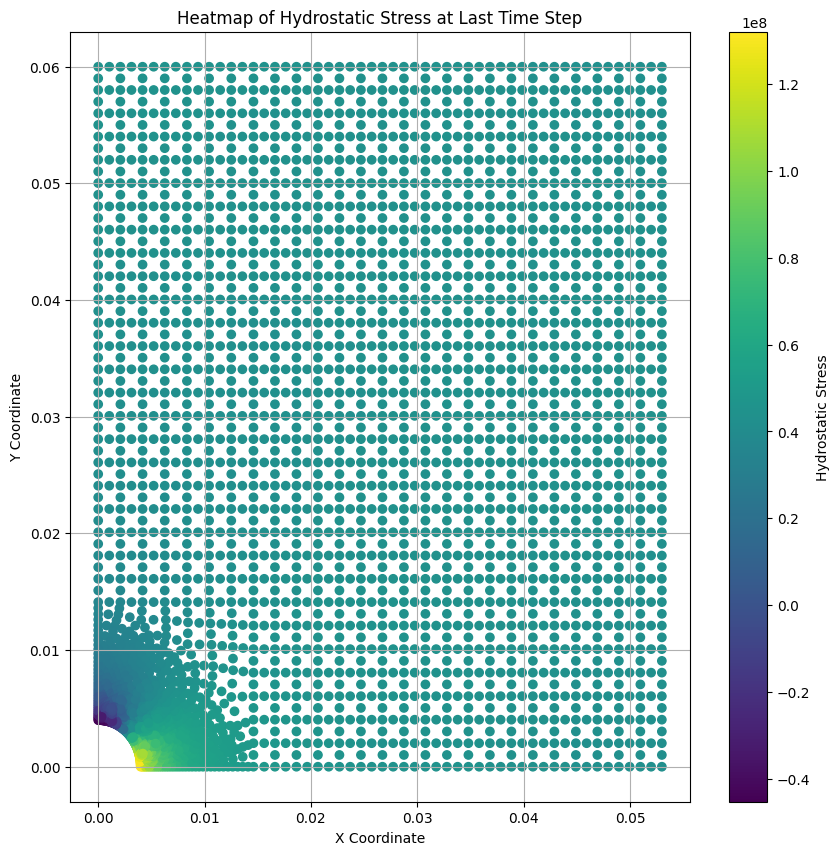

In [28]:
# Now we have three dataframes, we can plot heatmap
# X and Y coordinates are used to plot the nodes on the plot
# For hydrostatic stress, we only need to plot at last time step, thats why hydrostatic stress df
# has only 1 column
# But for hydrogen concentration, it evolves over time, so we have 101 columns at different time

# First, we plot heatmap of hydrostatic stress. 
# For values that does not exist, we will use a black color. 
# For values that exists, we vary from blue to red color

H2_conc_df = pd.read_csv('hydrogen_concentration.csv')
hydrostatic_stress_df = pd.read_csv('hydrostatic_stress.csv')
node_coordinates_df = pd.read_csv('nodes_coordinates.csv')

import matplotlib.pyplot as plt
import seaborn as sns

X_coord = node_coordinates['coord_X']
Y_coord = node_coordinates['coord_Y']
hydrostatic_stress_values = hydrostatic_stress['hydrostatic_stress']

# Plotting the heatmap
plt.figure(figsize=(10, 10))
sc = plt.scatter(X_coord, Y_coord, c=hydrostatic_stress_values, cmap='viridis')
plt.colorbar(sc, label='Hydrostatic Stress')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Heatmap of Hydrostatic Stress at Last Time Step')
plt.grid(True)  # Optional: to add grid for better visualization
plt.show()



### Now we do the same for hydrogen concentration

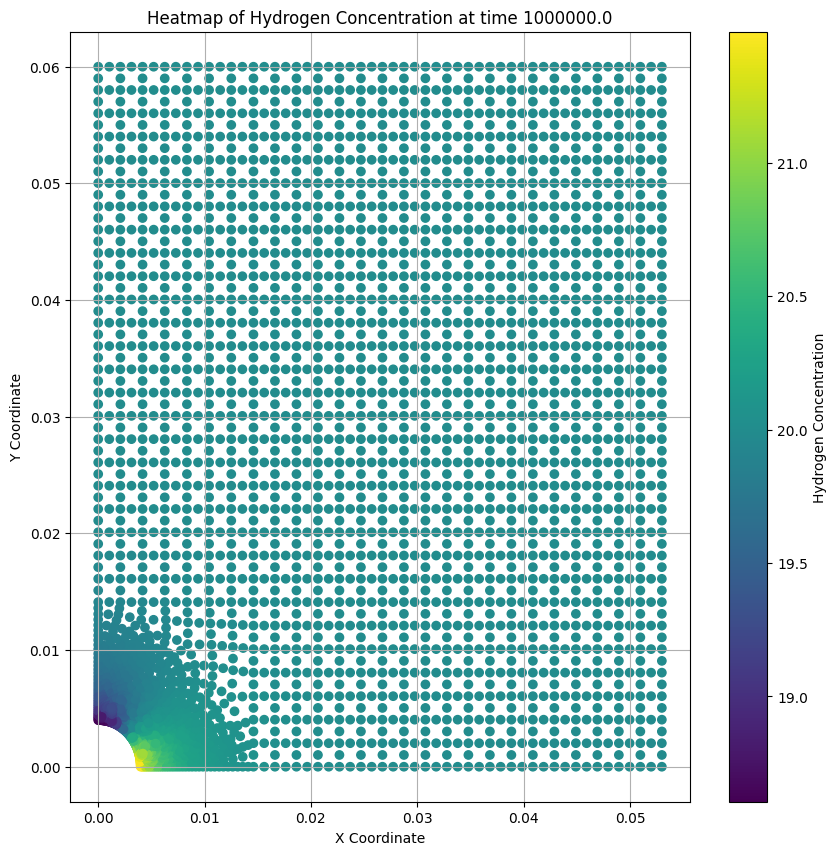

In [40]:
H2_conc_df = pd.read_csv('hydrogen_concentration.csv')
hydrostatic_stress_df = pd.read_csv('hydrostatic_stress.csv')
node_coordinates_df = pd.read_csv('nodes_coordinates.csv')

import matplotlib.pyplot as plt
import seaborn as sns

X_coord = node_coordinates['coord_X']
Y_coord = node_coordinates['coord_Y']
# We choose last time step to plot. In total there are 101 time steps, index from 0 to 100
# time_step varying from 0 to 100
time_step = 100
time_value = H2_conc_df.iloc[time_step, 0]
H2_conc_time_step = H2_conc_df.iloc[time_step, 1:]

# Plotting the heatmap
plt.figure(figsize=(10, 10))
sc = plt.scatter(X_coord, Y_coord, c=H2_conc_time_step, cmap='viridis')
plt.colorbar(sc, label='Hydrogen Concentration')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Heatmap of Hydrogen Concentration at time ' + str(time_value))
plt.grid(True)  # Optional: to add grid for better visualization
plt.show()